In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("temperature.log", header=None, names=['datetime', 'smoker_temp', 'meat_temp'])

In [4]:
past_minutes = 10
forecast_minutes = 10

past_steps = past_minutes * 60
forecast_steps = forecast_minutes * 60

In [5]:
# Reshape the data to fit the model
full_time = pd.to_datetime(df['datetime'], format='%H:%M:%S.%f')
full_time = (full_time - full_time.min()).dt.total_seconds().values.reshape(-1, 1)
X = full_time[-past_steps:]
y = df['smoker_temp'].values[-past_steps:]

# Polynomial Features Transformation (e.g., degree 2 for quadratic regression)
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit the Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly, y)

# Predict temperature values on the training set
y_pred = model.predict(X_poly)

# Calculate the Residual Sum of Squares
rss = np.sum((y - y_pred) ** 2)
n = len(y)
mse = rss / (n - degree - 1)  # Mean Squared Error
rmse = np.sqrt(mse)            # Root Mean Squared Error

# Predict for Future Times
last_value = X[-1] if np.isscalar(X[-1]) else X[-1][0]
int_list = range(int(last_value) + 1, int(last_value) + forecast_steps)
future_times = np.array([float(i) for i in int_list]).reshape(-1, 1)
future_times_poly = poly.transform(future_times)
future_predictions = model.predict(future_times_poly)

# Calculate Confidence Intervals
confidence_interval = 1.96 * rmse  # 95% confidence interval

# Upper and lower bounds
upper_bound = future_predictions + confidence_interval
lower_bound = future_predictions - confidence_interval

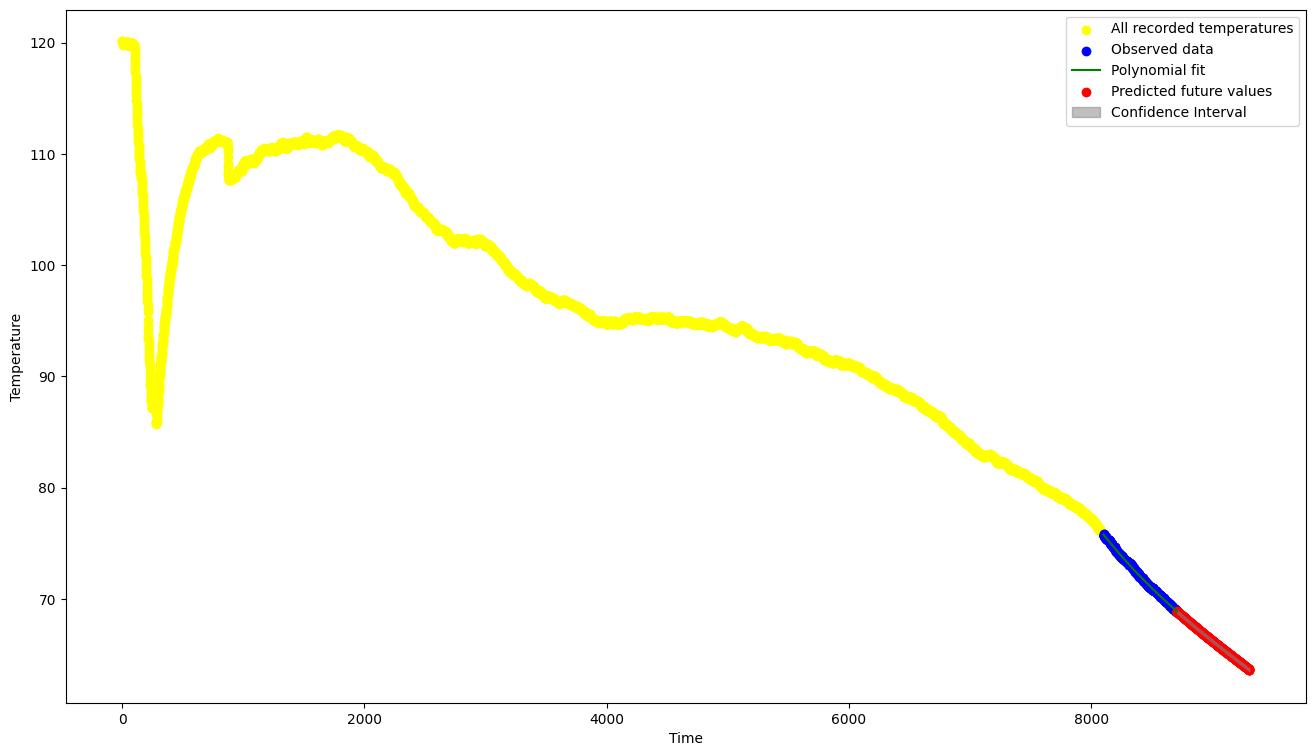

In [6]:
# Plot the results
plt.figure(figsize=(16, 9))
plt.scatter(full_time, df['smoker_temp'], color='yellow', label='All recorded temperatures')
plt.scatter(X, y, color='blue', label='Observed data')
plt.plot(X, y_pred, color='green', label='Polynomial fit')
plt.scatter(future_times, future_predictions, color='red', label='Predicted future values')
plt.fill_between(future_times.flatten(), lower_bound, upper_bound, color='gray', alpha=0.5, label='Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()